In [12]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.16.1'

In [13]:
import keras

data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.25),            # Rotação até 90 graus
    keras.layers.RandomFlip("horizontal_and_vertical"), # Flip horizontal e vertical
    keras.layers.RandomZoom(0.2),                 # Zoom in e out
    keras.layers.RandomTranslation(0.1, 0.1),     # Deslocamento horizontal e vertical
    keras.layers.RandomContrast(0.1),             # Ajuste de contraste
    keras.layers.RandomBrightness(0.1),           # Ajuste de brilho
    keras.layers.GaussianNoise(0.1),              # Adição de ruído gaussiano
])


In [14]:
# Data Parameters
# batch_size = 512
batch_size = 64

# Image Parameters
img_height, img_width = 120, 120

In [15]:
import pathlib

data_dir = pathlib.Path('data/train')

In [16]:
# Loading training dataset from Drive
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1562 files belonging to 4 classes.
Using 1250 files for training.


In [17]:
# Loading validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  label_mode="int",
  batch_size=64)


Found 1562 files belonging to 4 classes.
Using 312 files for validation.


In [18]:
class_names = train_ds.class_names
print('Number of Classes:',len(class_names))
print(class_names)

Number of Classes: 4
['0_ac_src', '1_cap', '2_inductor', '3_resistor']


In [19]:
normalization_layer = keras.layers.Rescaling(1./255)

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

regularization = 0.0005

In [20]:
from keras import layers
from keras import Sequential

model = Sequential([
    data_augmentation,  # Camada de data augmentation
    normalization_layer,

    layers.Conv2D(32, 4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),

    layers.Dense(len(class_names), activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0005))
])

In [21]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [31]:
history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=100)

Epoch 1/100


c:\Users\Nicollas Fernandes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.2737 - loss: 1.6402 - val_accuracy: 0.2244 - val_loss: 1.5211
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.2776 - loss: 1.5098 - val_accuracy: 0.3558 - val_loss: 1.4730
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.3570 - loss: 1.4575 - val_accuracy: 0.4231 - val_loss: 1.2660
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.4011 - loss: 1.3509 - val_accuracy: 0.5288 - val_loss: 1.1666
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.4691 - loss: 1.2197 - val_accuracy: 0.5673 - val_loss: 1.1890
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.5461 - loss: 1.0926 - val_accuracy: 0.6186 - val_loss: 0.9244
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.5888 - loss: 1.0111 - val_accuracy: 0.6410 - val_loss: 0.8471
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.6415 - loss: 0.8900 - val_accuracy: 0.6635

In [22]:
import matplotlib.pyplot as plt

# Plotar a acurácia de treinamento e validação
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Adicionar a grade
plt.grid(True)

# Exibir o gráfico
plt.show()


NameError: name 'history' is not defined

In [35]:
model.save('model.keras')

In [3]:
from sklearn import metrics

model.summary()
model.evaluate(val_ds,  batch_size=64, verbose=1)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 117, 117, 32)   │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 54, 54, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 23, 23, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792,238 (6.84 MB)

 Trainable params: 597,412 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,194,826 (4.56 MB)

NameError: name 'val_ds' is not defined

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [25]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.array(y)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Confusion matrix, without normalization


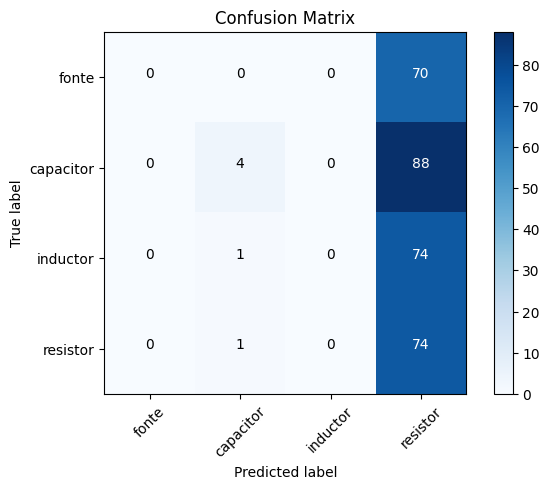

In [26]:
class_names = ['fonte', 'capacitor', 'inductor', 'resistor']

plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix',)

In [6]:
print(metrics.classification_report(y_true=labels, y_pred=predictions))

NameError: name 'metrics' is not defined